In [1]:
import numpy as np  
import pandas as pd 

In [2]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
athlete.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [5]:
athlete.shape

(271116, 15)

In [6]:
region.shape

(230, 3)

In [7]:
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
athlete['Season'].value_counts()

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

In [9]:
athlete=athlete[athlete['Season'] == 'Summer']

In [10]:
region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [11]:
athlete  = athlete.merge(region, on="NOC", how="left")

In [12]:
athlete.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [13]:
athlete['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [14]:
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [15]:
athlete.duplicated().sum()

1385

In [16]:
athlete.drop_duplicates(inplace=True)

In [17]:
athlete.duplicated().sum()

0

In [18]:
athlete['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [19]:
athlete=pd.concat( [athlete,pd.get_dummies(athlete['Medal']).astype(int)],axis=1)

In [20]:
athlete.shape

(221167, 20)

In [21]:
athlete.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [22]:
athlete.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [23]:
medal_tally=athlete.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [24]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [25]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']


In [26]:
medal_tally

NOC  Gold  Silver  Bronze  Total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [27]:
years=athlete['Year'].unique().tolist()

In [28]:
years.sort()

In [29]:
years.insert(0,'Overall')
print(years)

['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [30]:
country = np.unique(athlete['region'].dropna().values).tolist()


In [31]:
country.sort()

In [32]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [33]:
country.insert(0,'Overall')
print(country)

['Overall', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland'

In [34]:
def fetch_medal_tally(medal_df, year, country):
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
        x = temp_df.groupby('region').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    elif year == 'Overall' and country != 'Overall':
        temp_df = medal_df[medal_df['region'] == country]
        x = temp_df.groupby('Year').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()

    elif year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
        x = temp_df.groupby('region').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    else:
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
        x = temp_df.groupby('region').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].reset_index()

    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    return x


In [35]:
medal_df=athlete.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [36]:
#print(fetch_medal_tally('Overall', 'Overall').head())  # All-time medals by country
#print(fetch_medal_tally('Overall', 'India'))           # India's medals over the years
#print(fetch_medal_tally('2016', 'Overall'))            # All countries in 2016
print(fetch_medal_tally(medal_df,'1900', 'India'))              # India's 2016 medals


  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


In [37]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [38]:
df  = athlete

In [39]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [40]:
df['Year'].unique().shape[0]-1

28

In [41]:
df['City'].unique().shape

(23,)

In [42]:
df['Sport'].unique().shape

(52,)

In [43]:
df['Event'].unique().shape

(651,)

In [44]:
df['Name'].unique().shape

(116122,)

In [45]:
df['region'].unique().shape

(206,)

In [46]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [47]:
nations_over_time=df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index() .sort_values('Year')


In [48]:
nations_over_time

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [49]:
nations_over_time.rename(columns={'Year':'Edition','count':'NO Of Countries'},inplace=True)

In [50]:
import plotly.express as px

In [51]:
fig = px.line(nations_over_time,x='Edition',y='NO Of Countries')
fig.show()

In [52]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index() .sort_values('Year')

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

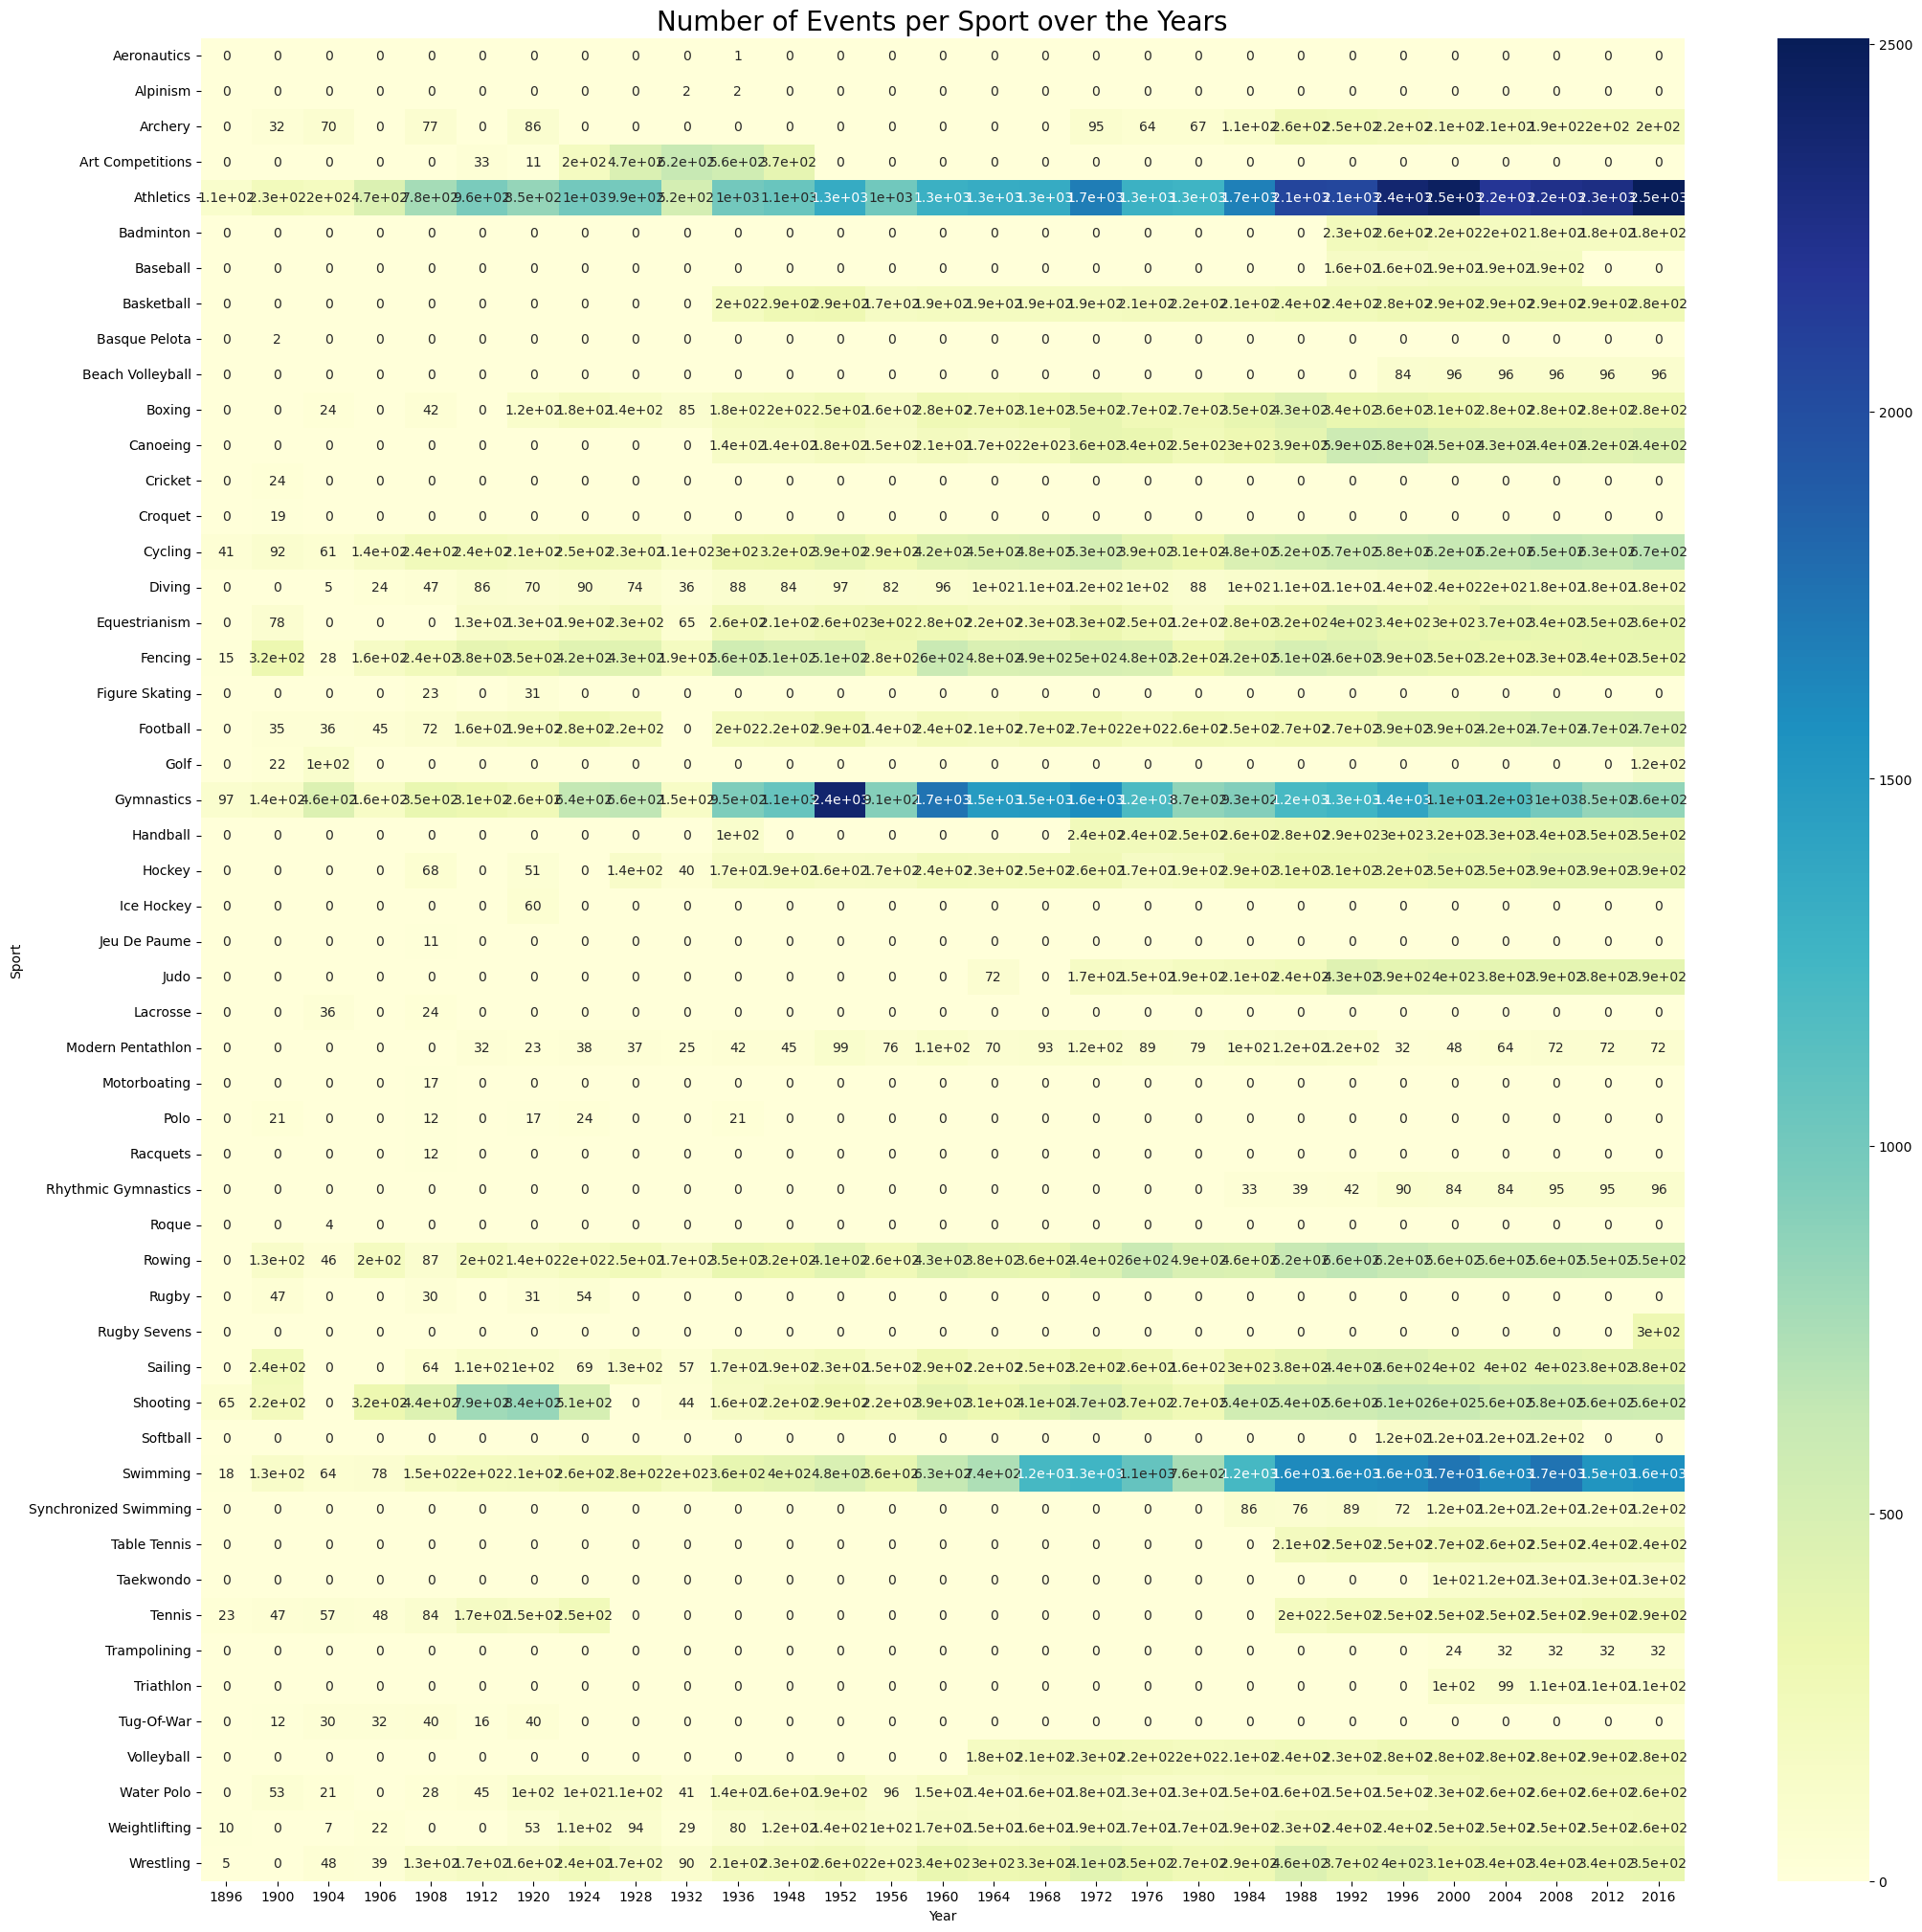

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25))
heatmap_data = df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

plt.title("Number of Events per Sport over the Years", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Sport")
plt.show()


In [54]:
x= df.drop_duplicates(['Year', 'Sport','Event'])

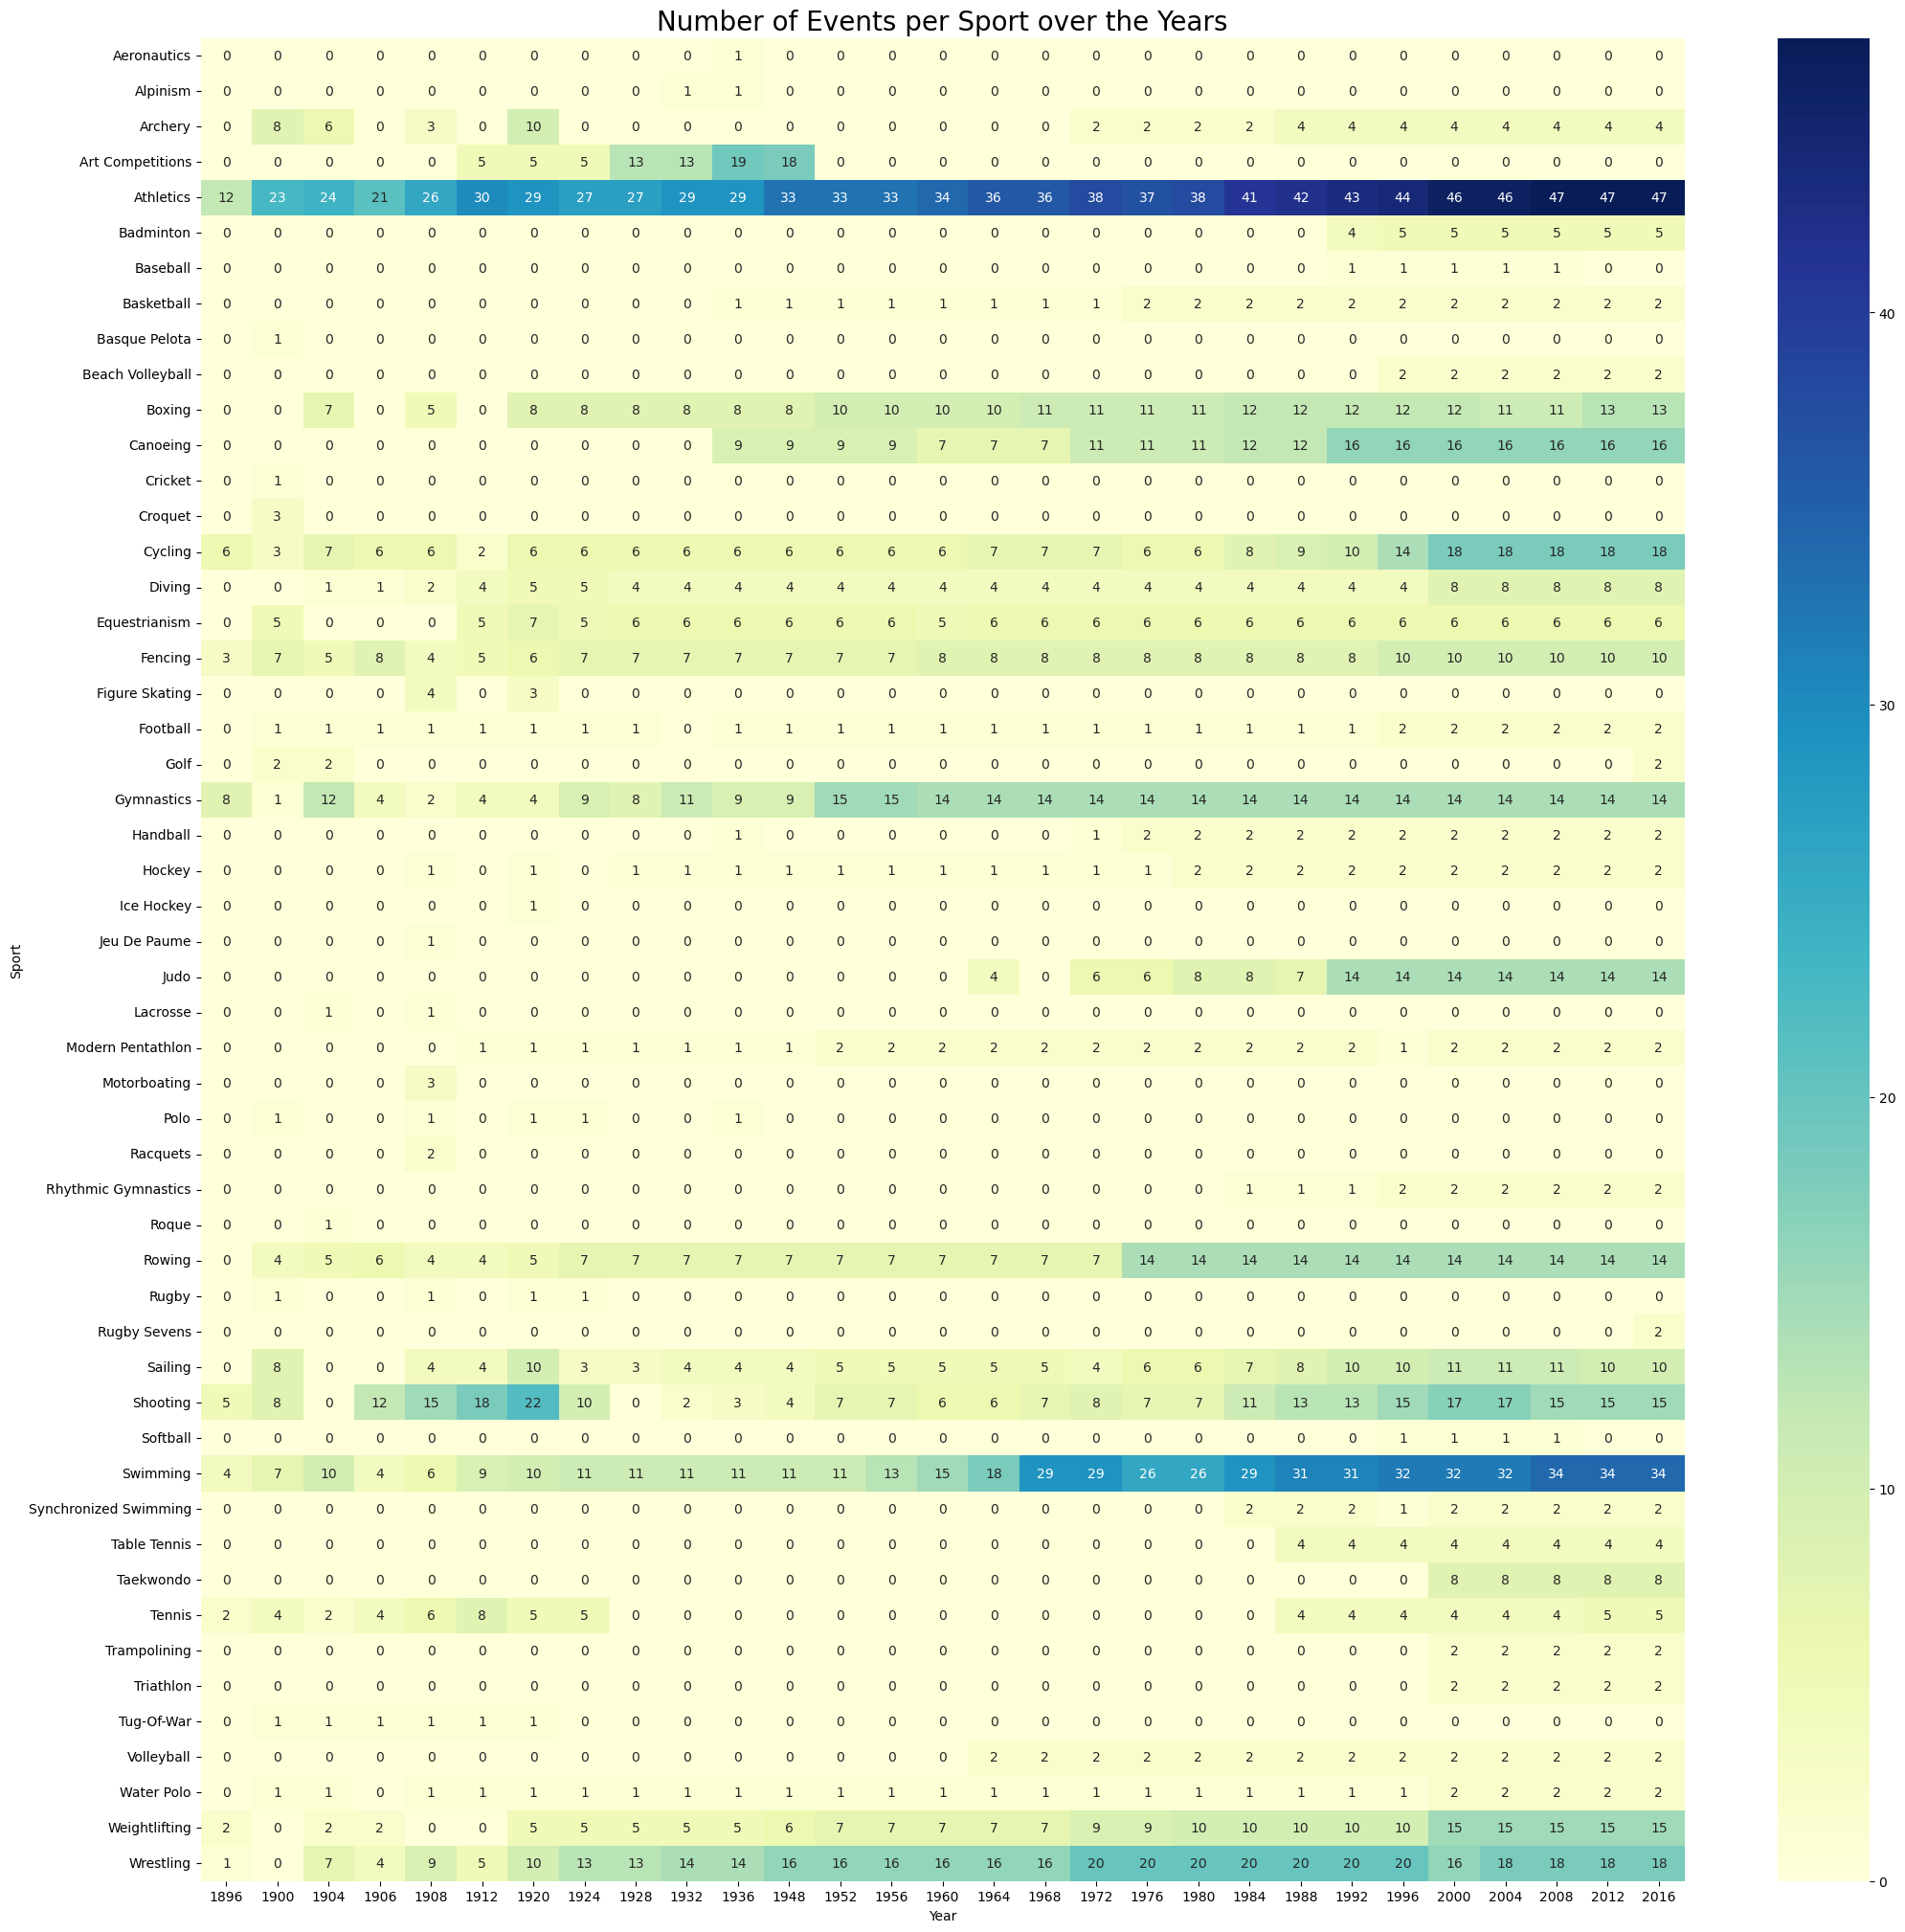

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25))
heatmap_data = x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

plt.title("Number of Events per Sport over the Years", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Sport")
plt.show()

In [56]:
def most_successful(df, sport):
    # Drop rows with no medals
    temp_df = df.dropna(subset=['Medal'])

    # Filter by sport if not Overall
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Count medals for each athlete
    top_athletes = (
        temp_df['Name']
        .value_counts()
        .reset_index()
        .head(10)
    )
    top_athletes.columns = ['Name', 'Medals']  # rename properly

    # Merge to get extra info like region and sport
    top_athletes = top_athletes.merge(df[['Name', 'region', 'Sport']], on='Name', how='left').drop_duplicates('Name')

    return top_athletes[['Name', 'Medals', 'Sport', 'region']]


In [57]:
most_successful(df, 'Overall')


Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany

In [58]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=[ 'Team', 'NOC', 'Games',
       'Year', 'City', 'Sport', 'Event', 'Medal'],inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4932\1376290521.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
temp_df.groupby('Year').count()['Medal']

Year
1896    120
1900    300
1904    280
1906    224
1908    322
1912    316
1920    449
1924    391
1928    356
1932    370
1936    422
1948    439
1952    457
1956    467
1960    461
1964    501
1968    527
1972    600
1976    613
1980    631
1984    685
1988    738
1992    814
1996    841
2000    925
2004    927
2008    963
2012    962
2016    973
Name: Medal, dtype: int64

In [60]:
new_df =temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [61]:
fig = px.line(final_df, x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

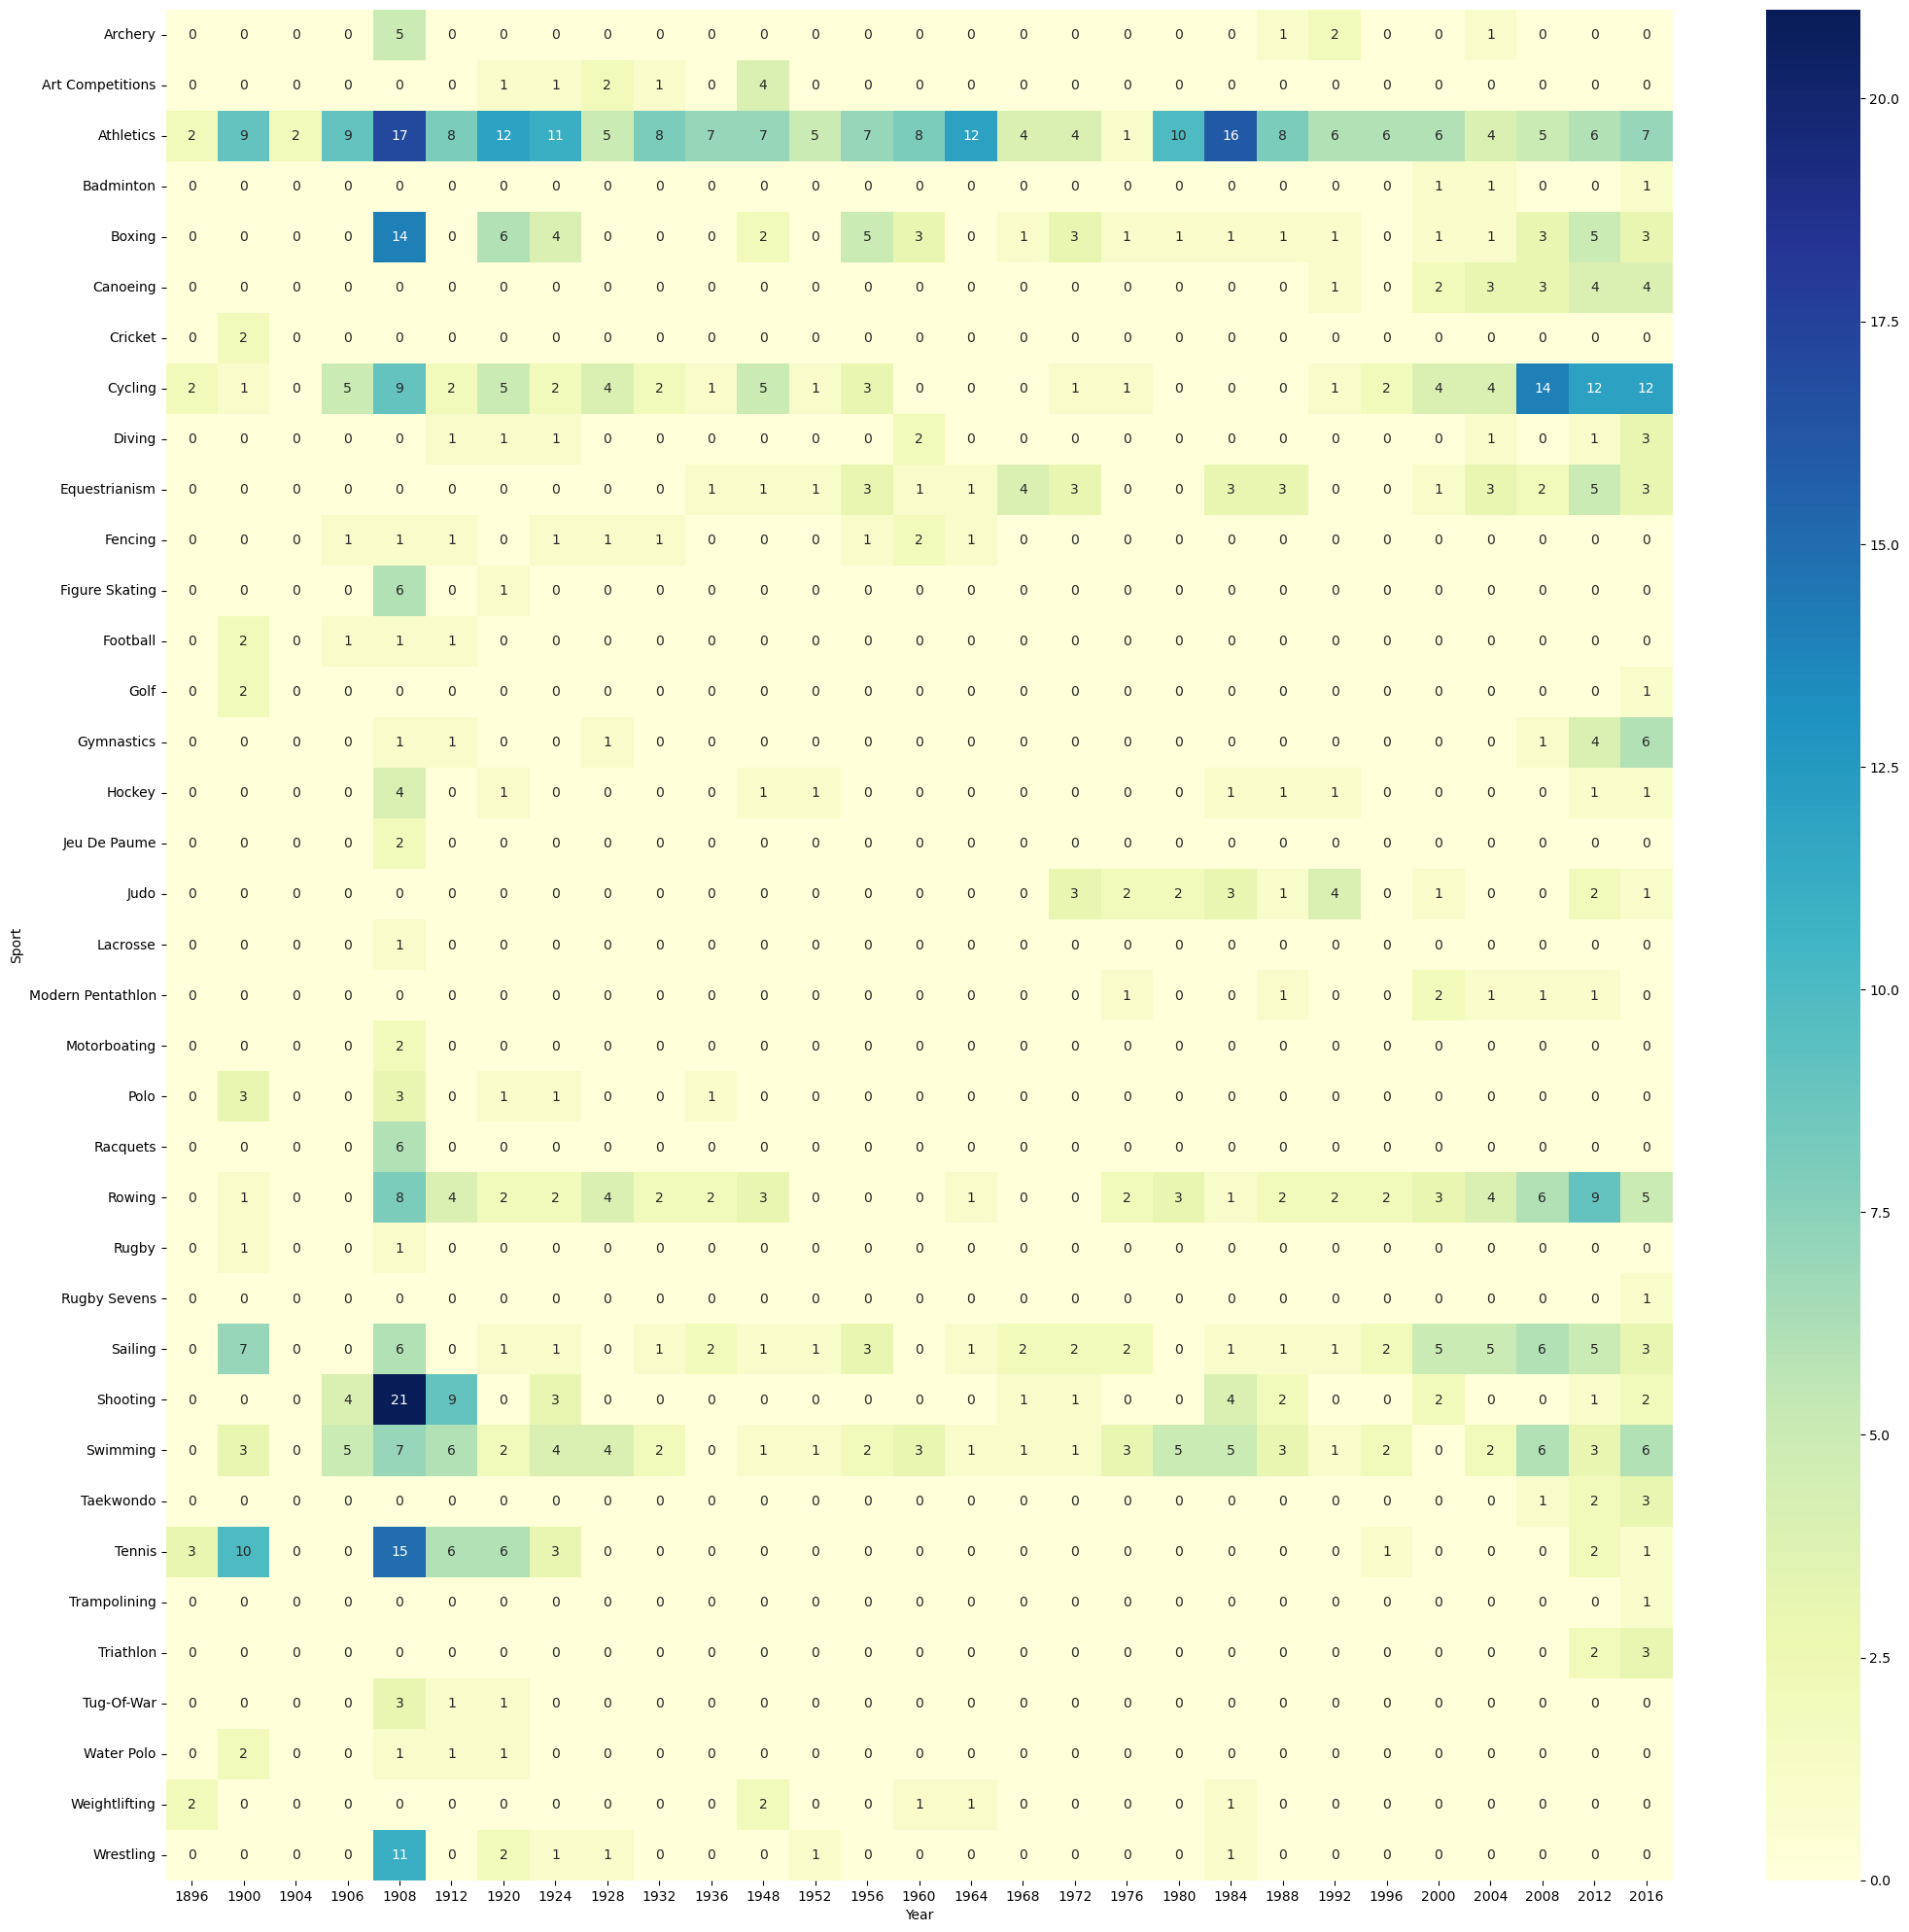

In [62]:
new_df =temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(25, 25))
heatmap_data = new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

In [63]:
def most_successful(df, country):
    # Drop rows with no medals
    temp_df = df.dropna(subset=['Medal'])

    # Filter by sport if not Overall
    
    temp_df = temp_df[temp_df['region'] == country]

    # Count medals for each athlete
    top_athletes = (
        temp_df['Name']
        .value_counts()
        .reset_index()
        .head(10)
    )
    top_athletes.columns = ['Name', 'Medals']  # rename properly

    # Merge to get extra info like region and sport
    top_athletes = top_athletes.merge(df[['Name', 'region', 'Sport']], on='Name', how='left').drop_duplicates('Name')

    return top_athletes[['Name', 'Medals', 'Sport']]


In [64]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [65]:
import plotly.figure_factory as ff 

In [66]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

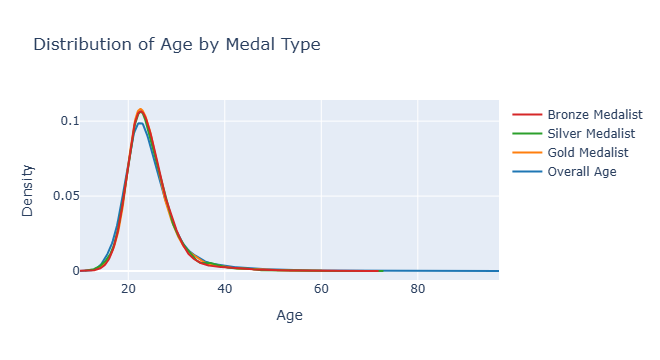

In [67]:
import plotly.figure_factory as ff

# Drop missing age values
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

# Create distribution plot
fig = ff.create_distplot(
    [x1, x2, x3, x4],
    ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],
    show_hist=False,
    show_rug=False
)

fig.update_layout(title="Distribution of Age by Medal Type", xaxis_title="Age", yaxis_title="Density")
fig.show()


In [68]:
famous_sports = [
        'Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling',
        'Fencing', 'Rowing', 'Wrestling', 'Football', 'Sailing',
        'Equestrianism', 'Canoeing', 'Boxing', 'Hockey', 'Basketball',
        'Weightlifting', 'Water Polo', 'Judo', 'Handball', 'Volleyball',
        'Tennis', 'Diving', 'Archery', 'Art Competitions', 'Table Tennis',
        'Modern Pentathlon', 'Badminton', 'Synchronized Swimming', 'Baseball',
        'Rhythmic Gymnastics', 'Taekwondo', 'Beach Volleyball', 'Triathlon',
        'Softball', 'Rugby Sevens', 'Golf', 'Tug-Of-War', 'Rugby',
        'Trampolining', 'Polo', 'Lacrosse', 'Ice Hockey', 'Figure Skating',
        'Cricket', 'Croquet', 'Motorboating', 'Racquets', 'Jeu De Paume',
        'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics'
    ]

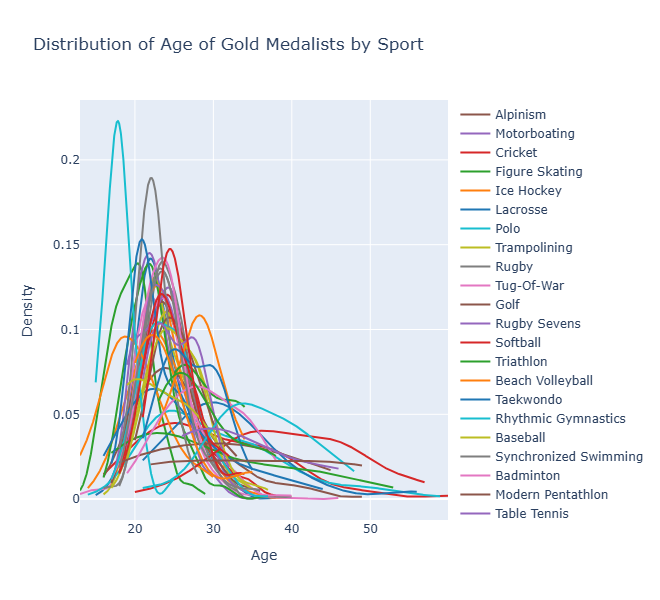

In [69]:
import plotly.figure_factory as ff

x = []
name = []

for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    gold_ages = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna()

    # Only include arrays with at least 2 unique values
    if len(gold_ages) >= 2 and gold_ages.nunique() > 1:
        x.append(gold_ages)
        name.append(sport)

# Make sure we have at least one valid dataset
if len(x) > 0:
    fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
    fig.update_layout(
        title="Distribution of Age of Gold Medalists by Sport",
        xaxis_title="Age",
        yaxis_title="Density",
        width=900,
        height=600
    )
    fig.show()
else:
    print("No valid gold medal age data available for plotting.")


In [71]:
athlete_df['Medal'].fillna('No Medal ',inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4932\2779773608.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





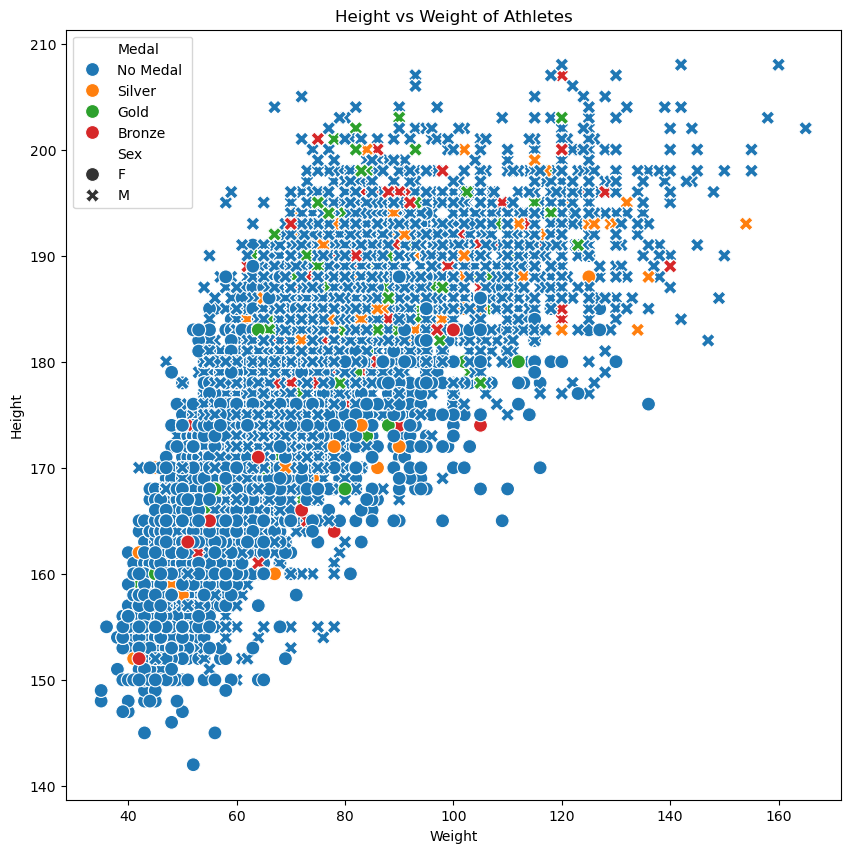

In [80]:
plt.figure(figsize=(10,10))
temp_df=athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x='Weight', y='Height', data=temp_df,hue=temp_df['Medal'],style=temp_df['Sex'],s =100)
plt.title("Height vs Weight of Athletes")
plt.show()

In [81]:
# Count male and female athletes per year
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

# Merge both dataframes
final = men.merge(women, on='Year')

# Rename columns for clarity
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

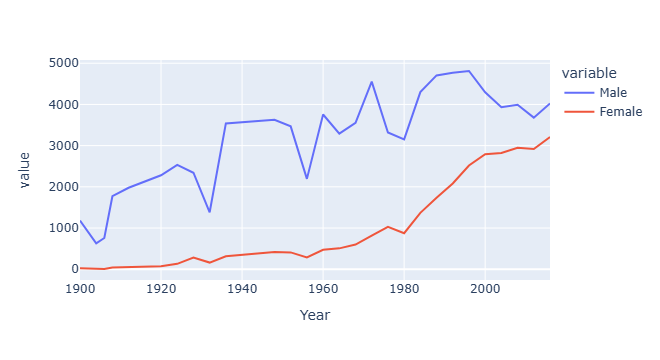

In [82]:
fig =px.line(final, x='Year',y= ['Male','Female'])
fig.show()